<a href="https://colab.research.google.com/github/TMGrayCoding/Rock-Paper-Scissors-1st/blob/main/FirstML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Tree Example

In [ ]:
import sklearn
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import cross_val_score

#load iris datasets and definite the attr. and label in datasets
iris = datasets.load_iris()
x=iris.data
y=iris.target

#make a decision tree
clf = tree.DecisionTreeClassifier()

#evaluate model perform with cross_val_score
scores = cross_val_score(clf, x, y, cv=5)
scores

#--> output: array([0.96666667, 0.96666667, 0.9       , 1.        , 1.        ])

In [ ]:
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

iris = pd.read_csv('Iris.csv')
iris.drop('Id',axis=1,inplace=True)

x = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]
y = iris['Species']

dtc = DecisionTreeClassifier()
dtc.fit(x, y)

dtc.predict([[6.2, 3.4, 5.4, 2.3]]) #output: array(['Iris-virginica'], dtype=object)

#Decision Tree Visualization
export_graphviz(
    dtc,
    out_file = "Iris_Tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded = True,
    filled = True
)

Linear Regression Example

In [ ]:
#                                                         # House Price Prediction #
import numpy as np
import matplotlib.pyplot as plt

#data jumlah kamar
bedrooms = np.array([1,1,2,2,3,4,4,5,5,5])
 
#data harga rumah($)
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])

#scatter plot
%matplotlib inline
 
plt.scatter(bedrooms, house_price)

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

#data jumlah kamar
bedrooms = np.array([1,1,2,2,3,4,4,5,5,5]).reshape(-1, 1)
 
#data harga rumah($)
house_price = np.array([15000, 18000, 27000, 34000, 50000, 68000, 65000, 81000,85000, 90000])

#model training with LinearRegression.fit()
LG = LinearRegression()
LG.fit(bedrooms, house_price)

#hubungan jumlah kamar dengan harga rumah
plt.scatter(bedrooms, house_price)
plt.plot(bedrooms, LG.predict(bedrooms))

Logistic Regression Example

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Social_Network_Ads.csv') 
data = df.drop(columns=['User ID'])
data = pd.get_dummies(data)
data

predictions = ['Age' , 'EstimatedSalary' , 'Gender_Female' , 'Gender_Male']
x = data[predictions]
y = data['Purchased'] 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
model = linear_model.LogisticRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.63

K-Means Example --------------------FAILED-------------------

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
#plot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns #statitiscal data visualization

df = pd.read_csv('Mall_Customers.csv')

df = df.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)
x = df.drop(['CustomerID', 'gender'], axis=1)
df.head()
#make inertia list
cluster = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(x)
  cluster.append(km.inertia_)

#make inertia plot
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=i, ax=ax)
ax.set_title('Elbow Method')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

#make another KMeans after using elbow method
km5 = KMeans(n_clusters=5).fit(X)
 
# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_
 
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()

Elbow from KMeans
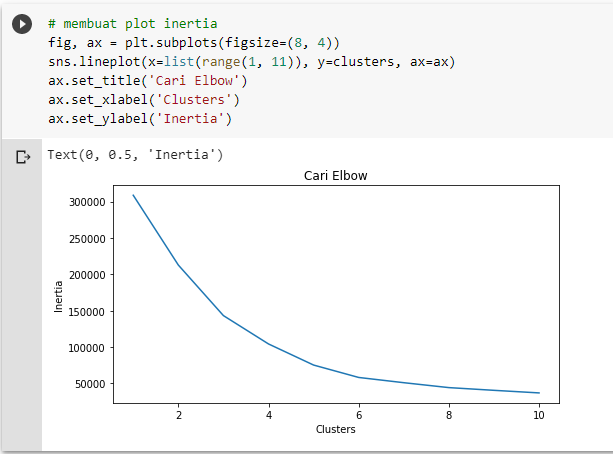



KMeans 5 Cluster
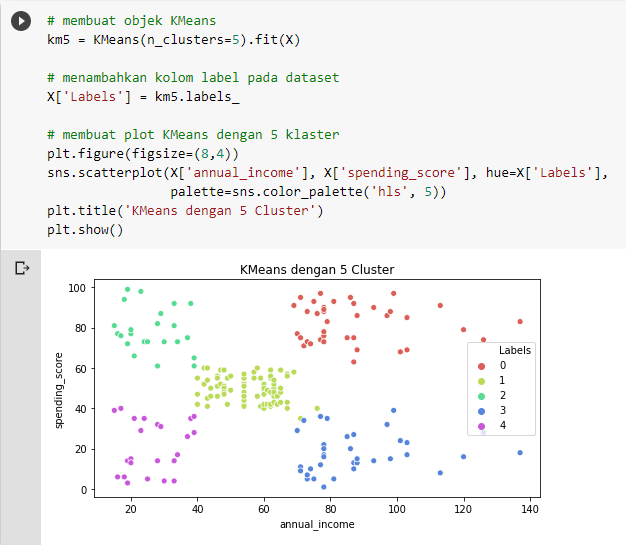

PCA(Principal Component Analysis)km5 = KMeans(n_clusters=5).fit(X)

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

iris = load_iris()
x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

dt = DecisionTreeClassifier()
first_model = dt.fit(x_train, y_train)
first_model.score(x_test, y_test)

#output = 0.9333333333333333

'''
#mencari PCA dengan nilai yang cukup tinggi
#PCA with 4 principal component||output(random): array([0.92626508, 0.05012936, 0.01805962, 0.00554594])
pca = PCA(n_components=4)
#mengaplikasikan PCA pada dataser
pca_attributes = pca.fit_transform(x_train)
#melihat variance pada setiap atribut
pca.explained_variance_ratio_
'''
#PCA with 2 principal component(input the highest score from PCA with 4 principal component)
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)

#test the classifier accuration
model2 = dt.fit(x_train_pca, y_train)
model2.score(x_test_pca, y_test)

0.9333333333333333

SVM(Support Vector Machine)

In [ ]:
                                          # Pima India Diabetes Database
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

df = pd.read_csv('diabetes.csv')

x = df[df.columns[:8]]
y = df['Outcome']

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
clf = SVC()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.7559055118110236

SVR(Support Vector Regression)

In [ ]:
                                                            # Salary_Data
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

sal = pd.read_csv('Salary_Data.csv')

x = sal['YearsExperience']
y = sal['Salary']
x = x[:,np.newaxis]

model = SVR(C=1000, gamma=0.05, kernel='rbf')   #i dunno bout this thing
model.fit(x, y)

plt.scatter(x, y)
plt.plot(x, model.predict(x))

SVR with grid search

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

sal = pd.read_csv('Salary_Data.csv')

x = sal['YearsExperience']
y = sal['Salary']
x = x[:,np.newaxis]

model = SVR()
param = {
    'kernel': ['rbf'],
    'C':     [1000, 10000, 100000],
    'gamma': [0.5, 0.05,0.005]
}
gs = GridSearchCV(model, param)
gs.fit(x, y)
print(gs.best_params_) # ---> the best model: {'C': 100000, 'gamma': 0.005, 'kernel': 'rbf'}

#make the best model from grid search result
new_model = SVR(C=100000, gamma=0.005, kernel='rbf')
new_model.fit(x, y)

plt.scatter(x, y)
plt.plot(x, new_model.predict(x))

Image Model Classification

In [ ]:
                                                              # Bedrooms Check
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2020-10-29 12:05:08--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  8.40MB/s    in 12s     

2020-10-29 12:05:21 (5.64 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [ ]:
import tensorflow as tf
import zipfile,os

local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

 # membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir, 'clean')
 # membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')
 # membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')
 # membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir, 'messy')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2
      )

Epoch 1/20
25/25 - 6s - loss: 0.7652 - accuracy: 0.5000 - val_loss: 0.6887 - val_accuracy: 0.5000
Epoch 2/20
25/25 - 6s - loss: 0.6955 - accuracy: 0.5100 - val_loss: 0.6951 - val_accuracy: 0.5000
Epoch 3/20
25/25 - 6s - loss: 0.7003 - accuracy: 0.5100 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 4/20
25/25 - 6s - loss: 0.7082 - accuracy: 0.5300 - val_loss: 0.6550 - val_accuracy: 0.5000
Epoch 5/20
25/25 - 6s - loss: 0.6862 - accuracy: 0.7000 - val_loss: 0.6794 - val_accuracy: 0.6500
Epoch 6/20
25/25 - 6s - loss: 0.7078 - accuracy: 0.4700 - val_loss: 0.7029 - val_accuracy: 0.5000
Epoch 7/20
25/25 - 6s - loss: 0.6969 - accuracy: 0.5700 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 8/20
25/25 - 6s - loss: 0.6945 - accuracy: 0.5200 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 9/20
25/25 - 6s - loss: 0.6935 - accuracy: 0.5400 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 10/20
25/25 - 6s - loss: 0.6909 - accuracy: 0.5000 - val_loss: 0.6889 - val_accuracy: 0.5000
Epoch 11/20
25/25 -

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('clean')
  else:
    print('messy')